# 1) Calories_consumed-> predict weight gained using calories consumed

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
Calories = pd.read_csv('calories_consumed.csv')
Calories.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [16]:
Calories=Calories.rename(columns={'Weight gained (grams)': 'wg','Calories Consumed': 'cc' })
print(Calories)

      wg    cc
0    108  1500
1    200  2300
2    900  3400
3    200  2200
4    300  2500
5    110  1600
6    128  1400
7     62  1900
8    600  2800
9   1100  3900
10   100  1670
11   150  1900
12   350  2700
13   700  3000


In [17]:
Calories.corr()

,wg,cc
wg,1.000000,0.946991
cc,0.946991,1.000000


Text(0, 0.5, 'Weight gained (grams)')

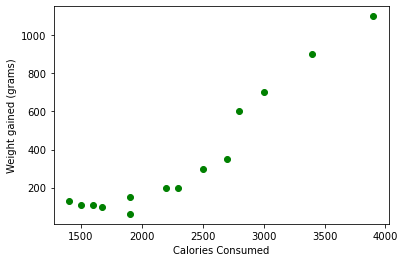

In [18]:
plt.scatter(x=Calories['cc'], y=Calories['wg'], color='green') 
plt.xlabel("Calories Consumed")
plt.ylabel("Weight gained (grams)")

In [19]:
Calories.describe()

,wg,cc
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [20]:
np.corrcoef(Calories.cc, Calories.wg) 

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [21]:
## to use SLR
import statsmodels.formula.api as smf

In [22]:
# Simple Linear Regression
model = smf.ols('wg ~ cc', data = Calories).fit()
model.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           2.86e-07
Time:                        20:26:14   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
cc             0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
pred1 = model.predict(pd.DataFrame(Calories['cc']))
pred1

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

In [28]:
res1 = Calories.wg - pred1
res_sqr1 = res1*res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

103.30250194726932

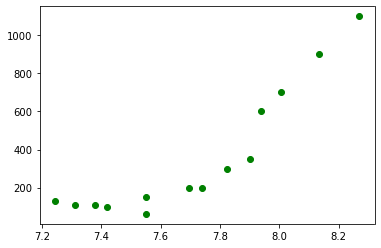

In [29]:
## Log transformation

plt.scatter(x=np.log(Calories['cc']),y=Calories['wg'],color='green')


In [30]:
np.corrcoef(np.log(Calories.wg), Calories.cc)

array([[1.        , 0.93680369],
       [0.93680369, 1.        ]])

In [56]:
model2 = smf.ols('wg ~ np.log(cc)',data = Calories).fit()
model2.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.25e-05
Time:                        22:49:48   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(cc)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model2.params

Intercept    -6955.650125
np.log(cc)     948.371723
dtype: float64

In [39]:
pred2 = model2.predict(pd.DataFrame(Calories['cc']))
pred2

0     -19.998702
1     385.377115
2     756.063670
3     343.220320
4     464.453875
5      41.207806
6     -85.429591
7     204.185731
8     571.931596
9     886.181334
10     81.817081
11    204.185731
12    537.441550
13    637.362484
dtype: float64

In [41]:
res2 = Calories.wg - pred2
res_sqr2 = res2*res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

141.00538169425104

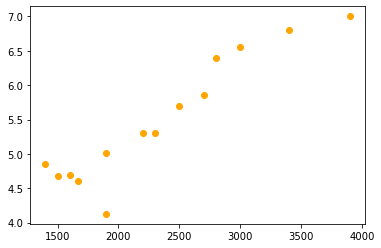

In [42]:
## Exponential Transformation

plt.scatter(x=Calories['cc'], y=np.log(Calories['wg']),color='orange')


In [43]:
#correlation
np.corrcoef(Calories.wg, np.log(Calories.cc)) 

array([[1.        , 0.89872528],
       [0.89872528, 1.        ]])

In [44]:
model3 = smf.ols('np.log(cc) ~ wg',data = Calories).fit()
model3.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(cc)   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.25e-05
Time:                        21:55:54   Log-Likelihood:                 8.3130
No. Observations:                  14   AIC:                            -12.63
Df Residuals:                      12   BIC:                            -11.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4068      0.058    128.367      0.000       7.281       7.533
wg             0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
pred3 = model3.predict(pd.DataFrame(Calories['wg']))
pred3_cc = np.exp(pred3)
pred3_cc


0     1805.909334
1     1953.101471
2     3545.194617
3     1953.101471
4     2126.731695
5     1808.988061
6     1836.933870
7     1736.526880
8     2745.847366
9     4203.546672
10    1793.646733
11    1871.676808
12    2219.252162
13    2989.952498
dtype: float64

In [48]:
res3 = Calories.cc - pred3_cc
res_sqr3 = res3*res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

272.4207117048494

In [49]:
## Polynomial Transformation
# x = wg; x^2 = wg*wg; y = log(cc)

model4 = smf.ols('np.log(cc) ~ wg + I(wg*wg)', data = Calories).fit()
model4.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(cc)   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     31.55
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           2.78e-05
Time:                        22:01:40   Log-Likelihood:                 10.125
No. Observations:                  14   AIC:                            -14.25
Df Residuals:                      11   BIC:                            -12.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2892      0.084     86.724      0.000       7.104       7.474
wg             0.0017      0.000      3.560      0.004       0.001       0.003
I(wg * wg) -7.689e-07   4.27e-07     -1.803      0.099   -1.71e-06     1.7e-07
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.721
Skew:                          -0.394   Prob(JB):                        0.697
Kurtosis:                       2.217   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
## Predict model 4

pred4 = model4.predict(pd.DataFrame(Calories))
pred4_cc = np.exp(pred4)
pred4_cc


0     1739.606122
1     1986.232241
2     3556.374964
3     1986.232241
4     2260.501362
5     1744.868700
6     1792.457905
7     1620.099409
8     3038.496984
9     3657.476403
10    1718.608337
11    1851.135743
12    2397.660886
13    3251.772007
dtype: float64

In [51]:
## Error in Model 4
res4 = Calories.cc - pred4_cc
res_sqr4 = res4*res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

240.82777570407256

In [69]:
# Choose the best model using RMSE (There are 5 more types of Error)
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,103.302502
1,Log model,141.005382
2,Exp model,272.420712
3,Poly model,240.827776


In [58]:
## CHOOSING THE BEST MODEL. SLR with the lowest RMSE value & Highest R2 value. So we choose SLR.

from sklearn.model_selection import train_test_split

train, test = train_test_split(Calories, test_size = 0.2)


finalmodel = smf.ols('wg ~ cc', data = train).fit()
finalmodel.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     85.78
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           6.75e-06
Time:                        23:05:17   Log-Likelihood:                -66.981
No. Observations:                  11   AIC:                             138.0
Df Residuals:                       9   BIC:                             138.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -602.4065    110.746     -5.440      0.000    -852.932    -351.881
cc             0.4146      0.045      9.262      0.000       0.313       0.516
==============================================================================
Omnibus:                        3.235   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                1.189
Skew:                          -0.334   Prob(JB):                        0.552
Kurtosis:                       1.535   Cond. No.                     7.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_cc = np.exp(test_pred)
pred_test_cc

10    1782.418929
0     1801.935624
11    1905.403046
dtype: float64

In [66]:
# Model Evaluation on Test data
test_res = test.cc - pred_test_cc
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

186.03971774482935

In [62]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_cc = np.exp(train_pred)
pred_train_cc

13    3215.461923
8     3008.846860
5     1806.825029
1     2030.381716
12    2410.087572
7     1690.674885
9     3691.197437
3     2030.381716
6     1851.005581
4     2283.498222
2     3534.232953
dtype: float64

In [63]:
# Model Evaluation on train data
train_res = train.cc - pred_train_cc
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

247.54138210347966

In [65]:
test_rmse, train_rmse

(186.03971774482935, 247.54138210347966)

Therefore, highest R-Squared value is SLR with 0.905

# 2) Delivery_time -> Predict delivery time using sorting time 

In [70]:
DLV = pd.read_csv('delivery_time.csv')
DLV.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [72]:
DLV=DLV.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })
print(DLV)

       dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [74]:
DLV.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


In [75]:
DLV.describe()

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Text(0, 0.5, 'Delivery Time')

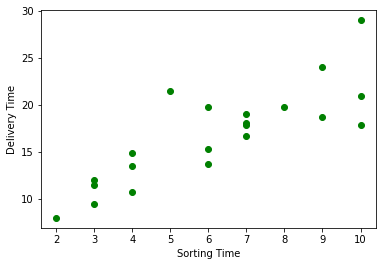

In [76]:
plt.scatter(x=DLV['st'], y=DLV['dt'], color='green') 
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [77]:
np.corrcoef(DLV.st, DLV.dt) 

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [78]:
# Simple Linear Regression
model = smf.ols('dt ~ st', data = DLV).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        23:37:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [81]:
pred1 = model.predict(pd.DataFrame(DLV['st']))
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [82]:
res1 = DLV.dt - pred1
res_sqr1 = res1*res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

2.7916503270617654

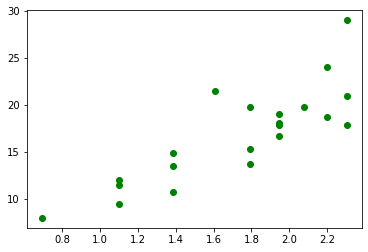

In [83]:
## Log transformation

plt.scatter(x=np.log(DLV['st']),y=DLV['dt'],color='green')

In [85]:
np.corrcoef(np.log(DLV.dt), DLV.st)

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

In [86]:
model2 = smf.ols('dt ~ np.log(st)',data = DLV).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        23:44:07   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
pred2 = model2.predict(pd.DataFrame(DLV['st']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [88]:
res2 = DLV.dt - pred2
res_sqr2 = res2*res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

2.733171476682066

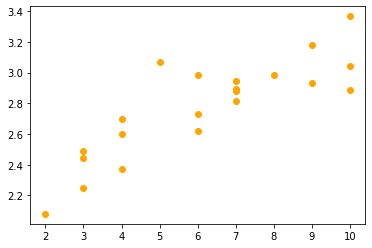

In [89]:
## Exponential Transformation

plt.scatter(x=DLV['st'], y=np.log(DLV['dt']),color='orange')

In [90]:
#correlation
np.corrcoef(DLV.dt, np.log(DLV.st)) 

array([[1.        , 0.83393253],
       [0.83393253, 1.        ]])

In [91]:
# Exponential Transformation

model3 = smf.ols('np.log(st) ~ dt',data = DLV).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(st)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        23:49:23   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
dt             0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
pred3 = model3.predict(pd.DataFrame(DLV['dt']))
pred3_st = np.exp(pred3)
pred3_st


0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [93]:
res3 = DLV.st - pred3_st
res_sqr3 = res3*res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

1.7921450016869793

In [94]:
## Polynomial Transformation
# x = wg; x^2 = wg*wg; y = log(cc)

model4 = smf.ols('np.log(st) ~ dt + I(dt*dt)', data = DLV).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(st)   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     34.62
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           6.77e-07
Time:                        23:52:24   Log-Likelihood:                 3.2337
No. Observations:                  21   AIC:                           -0.4673
Df Residuals:                      18   BIC:                             2.666
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7780      0.450     -1.730      0.101      -1.723       0.167
dt             0.2272      0.052      4.346      0.000       0.117       0.337
I(dt * dt)    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
## Predict model 4

pred4 = model4.predict(pd.DataFrame(DLV))
pred4_st = np.exp(pred4)
pred4_st

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [96]:
res4 = DLV.st - pred4_st
res_sqr4 = res4*res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

1.347141980025572

In [97]:
# Choose the best model using RMSE 
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,2.791650
1,Log model,2.733171
2,Exp model,1.792145
3,Poly model,1.347142


In [100]:
## CHOOSING THE BEST MODEL. Polynomial model with the lowest RMSE value & Highest R2 value. So we choose Poly model.

train, test = train_test_split(DLV, test_size = 0.2)


finalmodel = smf.ols('np.log(st) ~ dt + I(dt*dt)', data = train).fit()
finalmodel.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(st)   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     24.09
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           4.24e-05
Time:                        00:16:58   Log-Likelihood:                 2.7758
No. Observations:                  16   AIC:                            0.4483
Df Residuals:                      13   BIC:                             2.766
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5228      0.473     -1.105      0.289      -1.545       0.499
dt             0.1940      0.056      3.492      0.004       0.074       0.314
I(dt * dt)    -0.0034      0.002     -2.234      0.044      -0.007      -0.000
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   2.304
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.585
Skew:                          -0.352   Prob(JB):                        0.746
Kurtosis:                       2.382   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_st = np.exp(test_pred)
pred_test_st

3     8.585864
8     6.337878
0     7.635634
5     5.174419
10    7.172764
dtype: float64

In [102]:
# Model Evaluation on Test data
test_res = test.st - pred_test_st
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

2.0267598609435824

In [103]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_st = np.exp(train_pred)
pred_train_st

12    5.783994
9     6.714057
13    3.499821
7     2.743735
6     6.822429
14    3.715806
1     4.343023
11    3.204854
4     9.096939
20    7.819937
17    6.431783
16    4.453174
15    4.960270
19    6.306457
2     7.139702
18    2.245005
dtype: float64

In [104]:
# Model Evaluation on train data
train_res = train.st - pred_train_st
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

1.1874001119627375

In [105]:
test_rmse, train_rmse

(2.0267598609435824, 1.1874001119627375)

Therefore, highest R-Squared value 0.788 Polynomial using Polynomial Transformation

# Q3 Emp_data -> Build a prediction model for Churn_out_rate 

In [106]:
salchurn=pd.read_csv('emp_data.csv')
salchurn.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [122]:
salchurn.corr()

,Salary_hike,Churn_out_rate
Salary_hike,1.000000,-0.911722
Churn_out_rate,-0.911722,1.000000


In [139]:
salchurn=salchurn.rename(columns={'Salary_hike': 'sh','Churn_out_rate': 'ct'})
print(salchurn)

     sh  ct
0  1580  92
1  1600  85
2  1610  80
3  1640  75
4  1660  72
5  1690  70
6  1706  68
7  1730  65
8  1800  62
9  1870  60


This shows strong negative correlation (-0.912)

Text(0, 0.5, 'ct')

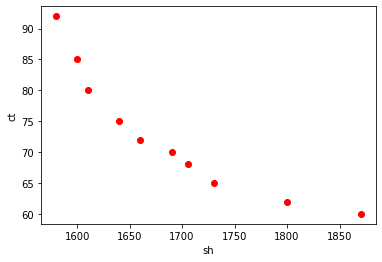

In [141]:
plt.scatter(x=salchurn.sh, y=salchurn.ct, color='red')
plt.xlabel("sh")
plt.ylabel("ct")

(array([2., 1., 2., 1., 1., 1., 0., 1., 0., 1.]),
 array([1580., 1609., 1638., 1667., 1696., 1725., 1754., 1783., 1812.,
        1841., 1870.]),
 <BarContainer object of 10 artists>)

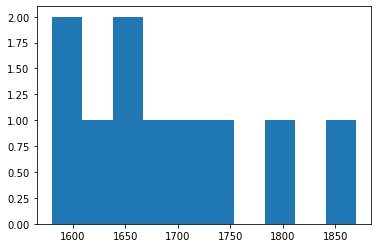

In [126]:
plt.hist(salchurn.sh)

(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <BarContainer object of 10 artists>)

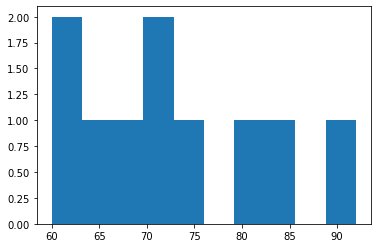

In [127]:
plt.hist(salchurn.ct)

In [114]:
salchurn.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [142]:
## simple model with no transformation

model=smf.ols("ct~sh",data=salchurn).fit()
model.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ct   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           0.000239
Time:                        21:40:04   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.000     181.291     307.439
sh            -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 value without transformation applied is 0.831

In [164]:
## Predicting simple model
pred1 = model.predict(pd.DataFrame(salchurn['sh']))
pred1

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

In [120]:
# Error calculation
res1 = salchurn.Salary_hike - pred1
res_sqr1 = res1*res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

1618.5639066055417

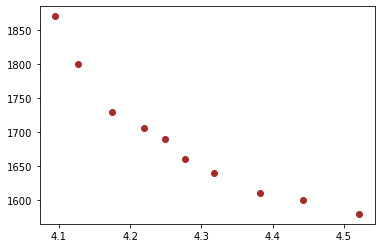

In [145]:
## Model using Log Transformation graph

plt.scatter(x=np.log(salchurn['ct']),y=salchurn['sh'],color='brown')

In [146]:
np.corrcoef(np.log(salchurn.ct), salchurn.sh)

array([[ 1.        , -0.93463607],
       [-0.93463607,  1.        ]])

In [147]:
## Model using Log Transformation

model2 = smf.ols('sh ~ np.log(ct)',data = salchurn).fit()
model2.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sh   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     55.26
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           7.38e-05
Time:                        21:42:10   Log-Likelihood:                -48.552
No. Observations:                  10   AIC:                             101.1
Df Residuals:                       8   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4366.4413    360.386     12.116      0.000    3535.390    5197.493
np.log(ct)  -625.5982     84.154     -7.434      0.000    -819.659    -431.538
==============================================================================
Omnibus:                        2.614   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                1.518
Skew:                           0.920   Prob(JB):                        0.468
Kurtosis:                       2.491   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
## prediction model 2
pred2 = model2.predict(pd.DataFrame(salchurn['ct']))
pred2

0    1537.618380
1    1587.126548
2    1625.053203
3    1665.428388
4    1690.966555
5    1708.590206
6    1726.724758
7    1754.952022
8    1784.513343
9    1805.026598
dtype: float64

In [150]:
## Error calculation for model 2
res2 = salchurn.ct - pred2
res_sqr2 = res2*res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

1618.281644035933

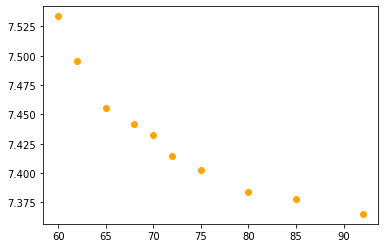

In [151]:
## Exponential transformation graph

plt.scatter(x=salchurn['ct'], y=np.log(salchurn['sh']),color='orange')

In [152]:
np.corrcoef(salchurn.ct, np.log(salchurn.sh))

array([[ 1.        , -0.92120773],
       [-0.92120773,  1.        ]])

In [153]:
## Building 3rd model using Exponential Transformation

model3 = smf.ols('np.log(sh) ~ ct',data = salchurn).fit()
model3.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(sh)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           0.000153
Time:                        21:45:41   Log-Likelihood:                 25.029
No. Observations:                  10   AIC:                            -46.06
Df Residuals:                       8   BIC:                            -45.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7816      0.053    147.045      0.000       7.660       7.904
ct            -0.0048      0.001     -6.697      0.000      -0.006      -0.003
==============================================================================
Omnibus:                        2.533   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                1.500
Skew:                           0.909   Prob(JB):                        0.472
Kurtosis:                       2.455   Cond. No.                         556.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
## predict model 3

pred3 = model3.predict(pd.DataFrame(salchurn['ct']))
pred3_sh = np.exp(pred3)
pred3_sh


0    1538.107442
1    1590.874355
2    1629.669737
3    1669.411191
4    1693.719752
5    1710.121788
6    1726.682662
7    1751.825162
8    1777.333766
9    1794.545523
dtype: float64

In [158]:
res3 = salchurn.sh - pred3_sh
res_sqr3 = res3*res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

34.2685498067447

In [159]:
## Polynomial Transformation

model4 = smf.ols('np.log(sh) ~ ct + I(ct*ct)', data = salchurn).fit()
model4.summary()

C:\Users\User-PC\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(sh)   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           1.44e-06
Time:                        21:49:43   Log-Likelihood:                 34.809
No. Observations:                  10   AIC:                            -63.62
Df Residuals:                       7   BIC:                            -62.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8843      0.170     52.109      0.000       8.481       9.287
ct            -0.0345      0.005     -7.560      0.000      -0.045      -0.024
I(ct * ct)     0.0002   3.02e-05      6.519      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.031
Skew:                          -0.049   Prob(JB):                        0.984
Kurtosis:                       2.744   Cond. No.                     3.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
pred4 = model4.predict(pd.DataFrame(salchurn))
pred4_sh = np.exp(pred4)
pred4_sh

0    1589.986867
1    1586.954468
2    1603.603148
3    1636.439131
4    1664.299491
5    1686.449475
6    1711.585002
7    1755.162516
8    1806.232227
9    1844.725957
dtype: float64

In [161]:
# Error calculation
res4 = salchurn.sh - pred4_sh
res_sqr4 = res4*res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


13.02527210719252

In [162]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,1618.563907
1,Log model,1618.281644
2,Exp model,34.268550
3,Poly model,13.025272


Polynomial is the best model with R^2 Value of 0.979 together with lowest RMSE value of 13.025

# Q4. Salary_hike -> Build a prediction model for Salary_hike

In [168]:
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [171]:
salary.corr()

,YE,S
YE,1.000000,0.978242
S,0.978242,1.000000


This shows strong positive correlation (0.978)

In [170]:
salary=salary.rename(columns={'YearsExperience':'YE', 'Salary':'S'})
salary

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Text(0, 0.5, 'Salary')

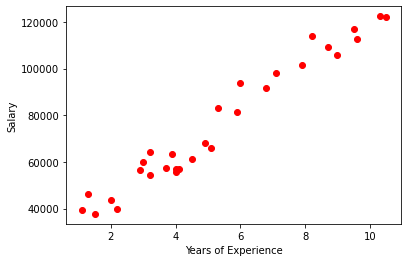

In [172]:
plt.scatter(x=salary.YE, y=salary.S, color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

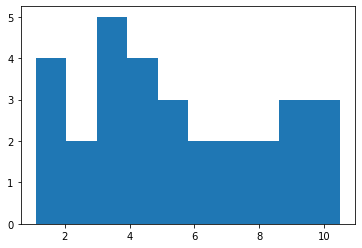

In [173]:
plt.hist(salary.YE)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

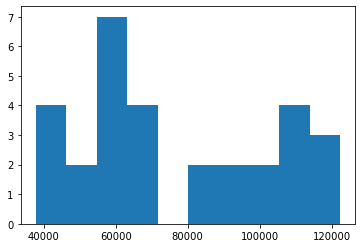

In [174]:
plt.hist(salary.S)

In [175]:
salary.describe()

,YE,S
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [176]:
## simple model with no transformation

model=smf.ols("S~YE",data=salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        22:10:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 Value is very high at 0.957 without any transformation applied

In [183]:
## Predicting simple model
pred1 = model.predict(pd.DataFrame(salary['YE']))
pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [184]:
# Error calculation
res1 = salary.YE - pred1
res_sqr1 = res1*res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

80440.84508275457

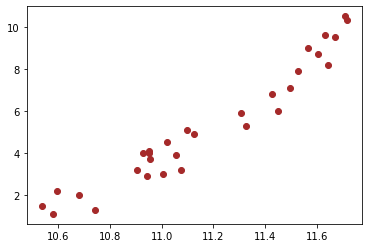

In [185]:
## Model using Log Transformation graph

plt.scatter(x=np.log(salary['S']),y=salary['YE'],color='brown')

In [186]:
np.corrcoef(np.log(salary.S), salary.YE)

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

This shows strong positive correlation (0.965), but lower than simple model (0.978)

In [187]:
## Model using Log Transformation

model2 = smf.ols('YE ~ np.log(S)',data = salary).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           7.03e-18
Time:                        22:23:47   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(S)      7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
## prediction model 2
pred2 = model2.predict(pd.DataFrame(salary['S']))
pred2

0     0.901345
1     2.095676
2     0.590552
3     1.651785
4     1.004105
5     3.608650
6     4.055053
7     3.314768
8     4.567424
9     3.680047
10    4.424619
11    3.496591
12    3.649849
13    3.666005
14    4.172803
15    4.959542
16    4.747810
17    6.454999
18    6.299145
19    7.366932
20    7.190723
21    7.701920
22    7.927435
23    8.792461
24    8.500852
25    8.234853
26    8.995721
27    8.715235
28    9.332335
29    9.300766
dtype: float64

In [189]:
## Error calculation for model 2
res2 = salary.S - pred2
res_sqr2 = res2*res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

80635.00547529483

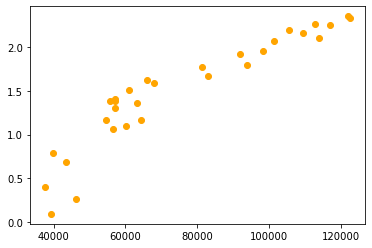

In [190]:
## Exponential transformation graph

plt.scatter(x=salary['S'], y=np.log(salary['YE']),color='orange')

In [191]:
np.corrcoef(salary.S, np.log(salary.YE))

array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

This shows strong positive correlation (0.924), but lower than log transformation model (0.965)

In [192]:
## Building 3rd model using Exponential Transformation

model3 = smf.ols('np.log(YE) ~ S',data = salary).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(YE)   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           3.25e-13
Time:                        22:29:43   Log-Likelihood:                0.92814
No. Observations:                  30   AIC:                             2.144
Df Residuals:                      28   BIC:                             4.946
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
S           2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
## predict model 3

pred3 = model3.predict(pd.DataFrame(salary['S']))
pred3_ye = np.exp(pred3)
pred3_ye

0      2.082591
1      2.406075
2      2.013138
3      2.274150
4      2.106743
5      2.996972
6      3.226553
7      2.861583
8      3.531723
9      3.031665
10     3.441710
11     2.943971
12     3.016901
13     3.024783
14     3.292460
15     3.801069
16     3.651416
17     5.228136
18     5.041779
19     6.569203
20     6.271779
21     7.196275
22     7.669850
23     9.979380
24     9.100597
25     8.392621
26    10.664790
27     9.735272
28    11.953599
29    11.823772
dtype: float64

In [194]:
res3 = salary.YE - pred3_ye
res_sqr3 = res3*res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

0.8649536763615346

In [195]:
## Polynomial Transformation

model4 = smf.ols('np.log(YE) ~ S + I(S*S)', data = salary).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(YE)   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           1.12e-14
Time:                        22:33:32   Log-Likelihood:                 7.7666
No. Observations:                  30   AIC:                            -9.533
Df Residuals:                      27   BIC:                            -5.330
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5369      0.381     -4.036      0.000      -2.318      -0.755
S           6.153e-05   1.03e-05      5.951      0.000    4.03e-05    8.27e-05
I(S * S)   -2.514e-10   6.37e-11     -3.949      0.001   -3.82e-10   -1.21e-10
==============================================================================
Omnibus:                        3.765   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.504
Skew:                          -0.687   Prob(JB):                        0.286
Kurtosis:                       3.340   Cond. No.                     8.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
pred4 = model4.predict(pd.DataFrame(salary))
pred4_ey = np.exp(pred4)
pred4_ey

0     1.640306
1     2.158776
2     1.532540
3     1.944664
4     1.678141
5     3.132728
6     3.507003
7     2.909766
8     3.992882
9     3.189644
10    3.851228
11    3.045589
12    3.165437
13    3.178363
14    3.613219
15    4.407015
16    4.178802
17    6.297870
18    6.082301
19    7.576149
20    7.332354
21    8.022489
22    8.303352
23    9.114878
24    8.901371
25    8.648772
26    9.216598
27    9.065610
28    9.284743
29    9.284136
dtype: float64

In [199]:
# Error calculation
res4 = salary.YE - pred4_ey
res_sqr4 = res4*res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


0.7214302704516455

In [200]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,80440.845083
1,Log model,80635.005475
2,Exp model,0.864954
3,Poly model,0.721430


Polynomial Transormation is the best transformation with R^2 is 0.907 with smallest RMSE value 0.721